# support vector machine(SVM)

- SVM means drawing the best line (or curve that separates different groups in your data
- it finds the line (or hyper plane) that gives the maximum margin, meanings its as far away as possible from both groups
- works for classification(predict categories) and regression
- simple example : imagine seperating red and blue balls on a table SVM finds the straightest divider between them

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.datasets import load_iris
from sklearn.svm import SVC

In [20]:
data= load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['species']=data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


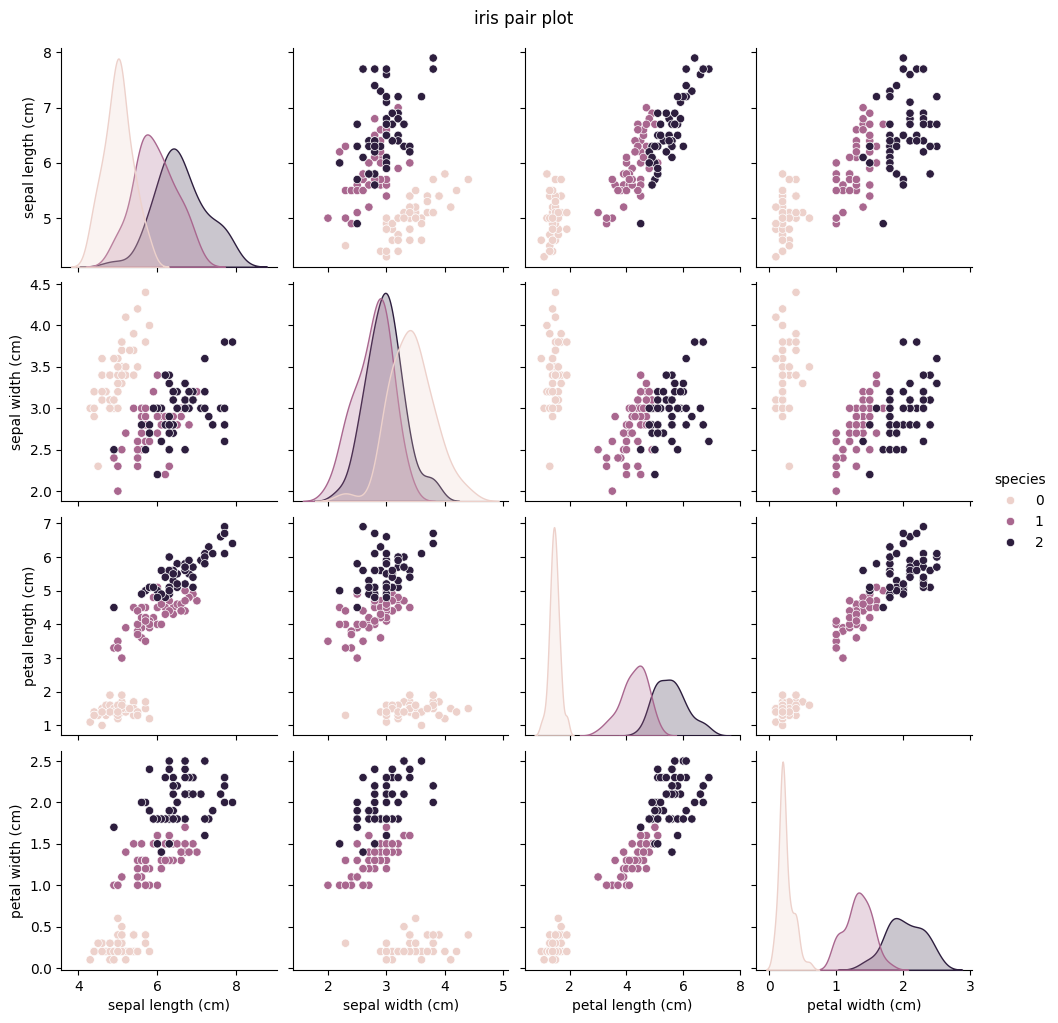

In [21]:
sns.pairplot(df,hue='species',diag_kind="kde")
plt.suptitle('iris pair plot',y = 1.02)
plt.show()

In [22]:
X=df.drop('species',axis=1)
y=df['species']
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [23]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= 0.2,random_state=42)

In [25]:
model=SVC(kernel= 'linear')
model.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [26]:
y_pred=model.predict(X_test)
print('accuracy',accuracy_score(y_test,y_pred))

accuracy 1.0


In [29]:
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))

confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [30]:
print('classification report',classification_report(y_test,y_pred))

classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [32]:
X_2d=df[['petal length (cm)','petal width (cm)']]
y_2d=df['species']

In [55]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X_2d,y_2d,test_size=0.2,random_state=42)

In [38]:
model2=SVC(kernel= 'linear',decision_function_shape='ovr')
model2.fit(X_train2,y_train2)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [39]:
y_pred2=model2.predict(X_test2)
print('accuracy',accuracy_score(y_test2,y_pred2))

accuracy 1.0


In [41]:
print('confusion matrix\n', confusion_matrix(y_test2,y_pred2))

confusion matrix
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [43]:
print('classification report\n', classification_report(y_test2,y_pred2))

classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [52]:
x_min,x_max=X_2d['petal length (cm)'].min()-1,X_2d['petal length (cm)'].max()+1
y_min,y_max=X_2d['petal width (cm)'].min()-1,X_2d['petal width (cm)'].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
Z=model2.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


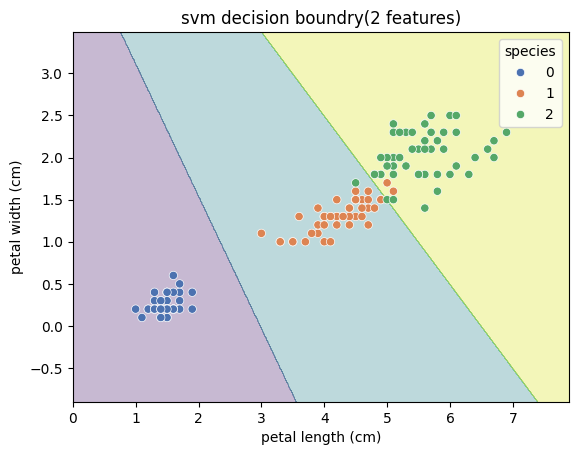

In [54]:
plt.contourf(xx,yy,Z,alpha=0.3)
sns.scatterplot(x='petal length (cm)', y='petal width (cm)',hue='species',data=df,palette='deep')
plt.title('svm decision boundry(2 features)')
plt.show()

rbf and polly